# Flood Prediction in Kerala India

Dalam Notebook ini, saya akan membuat analisis dan prediksi Classification dari data di Kerala India tentang curah hujan dan terjadi banjir atau tidak.

Dalam data tersebut, terdapat tentang tahun dimulai dari 1901-2018, curah hujan bulan Januari-Desember, curah hujan total selama setahun, dan fitur label terjadi banjir atau tidak.

In [2]:
#import library
import numpy as np
import pandas as pd #dataframe operation
import matplotlib.pyplot as plt #visualisasi
import seaborn as sns #visualisasi
import warnings
warnings.filterwarnings('ignore')
import datetime

In [3]:
# Import Dataset
df = pd.read_csv('kerala.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [5]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [6]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,SUBDIVISION,object,0,0.0,2,[KERALA],1.69
1,YEAR,int64,0,0.0,118,"[1989, 1909, 2005]",100.00
2,JAN,float64,0,0.0,87,"[10.3, 1.6, 20.5]",73.73
3,FEB,float64,0,0.0,96,"[16.0, 30.0, 9.1]",81.36
4,MAR,float64,0,0.0,108,"[28.3, 31.1, 12.7]",91.53
5,APR,float64,0,0.0,116,"[104.1, 93.4, 120.7]",98.31
6,MAY,float64,0,0.0,118,"[347.2, 214.5, 87.7]",100.00
7,JUN,float64,0,0.0,116,"[566.7, 704.7, 582.9]",98.31
8,JUL,float64,0,0.0,116,"[489.8, 1008.7, 696.0]",98.31
9,AUG,float64,0,0.0,116,"[315.0, 235.0, 369.7]",98.31


In [7]:
df['SUBDIVISION'].unique()

array(['KERALA', 'KERALA '], dtype=object)

In [8]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [9]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SUBDIVISION       118 non-null    object        
 1   YEAR              118 non-null    datetime64[ns]
 2   JAN               118 non-null    float64       
 3   FEB               118 non-null    float64       
 4   MAR               118 non-null    float64       
 5   APR               118 non-null    float64       
 6   MAY               118 non-null    float64       
 7   JUN               118 non-null    float64       
 8   JUL               118 non-null    float64       
 9   AUG               118 non-null    float64       
 10  SEP               118 non-null    float64       
 11  OCT               118 non-null    float64       
 12  NOV               118 non-null    float64       
 13  DEC               118 non-null    float64       
 14   ANNUAL RAINFALL  118 non-

In [11]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901-01-01,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902-01-01,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903-01-01,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904-01-01,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905-01-01,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [12]:
df['YEAR'] = df['YEAR'].dt.year

In [13]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [14]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

## EDA

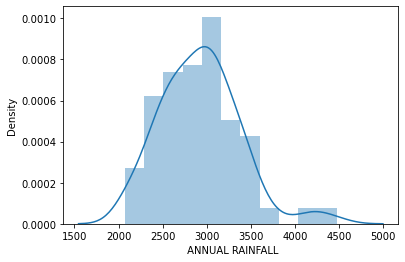

In [15]:
sns.distplot(df[' ANNUAL RAINFALL'])

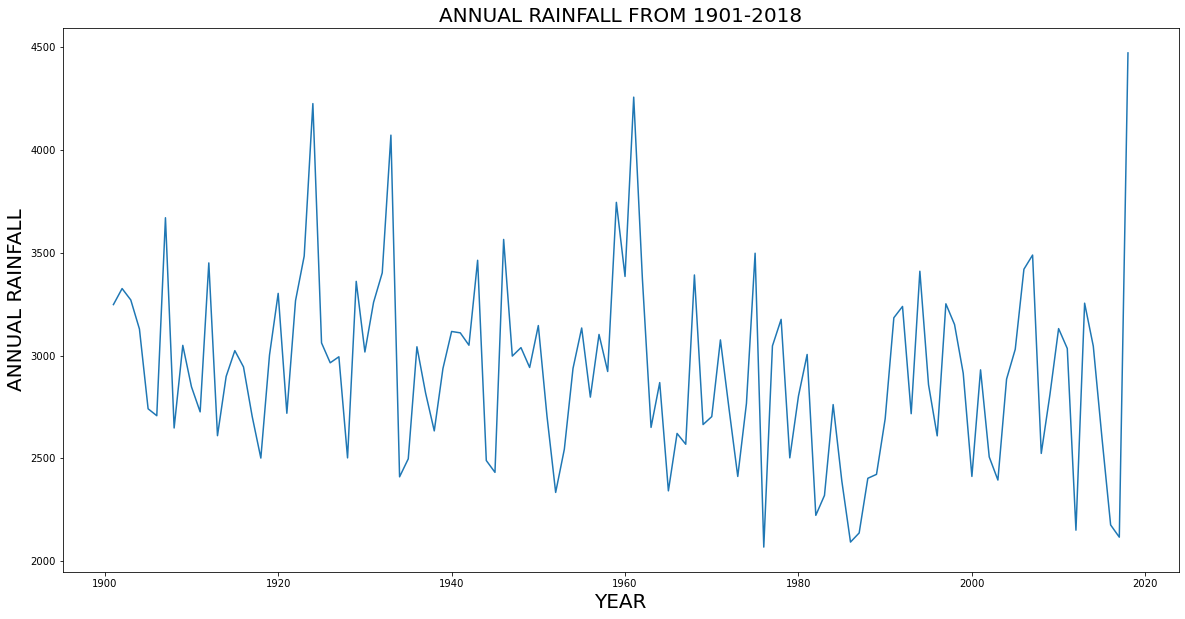

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(y=" ANNUAL RAINFALL",x="YEAR",data=df)
plt.title("ANNUAL RAINFALL FROM 1901-2018",fontsize=20)
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("ANNUAL RAINFALL",fontsize=20)
plt.show()

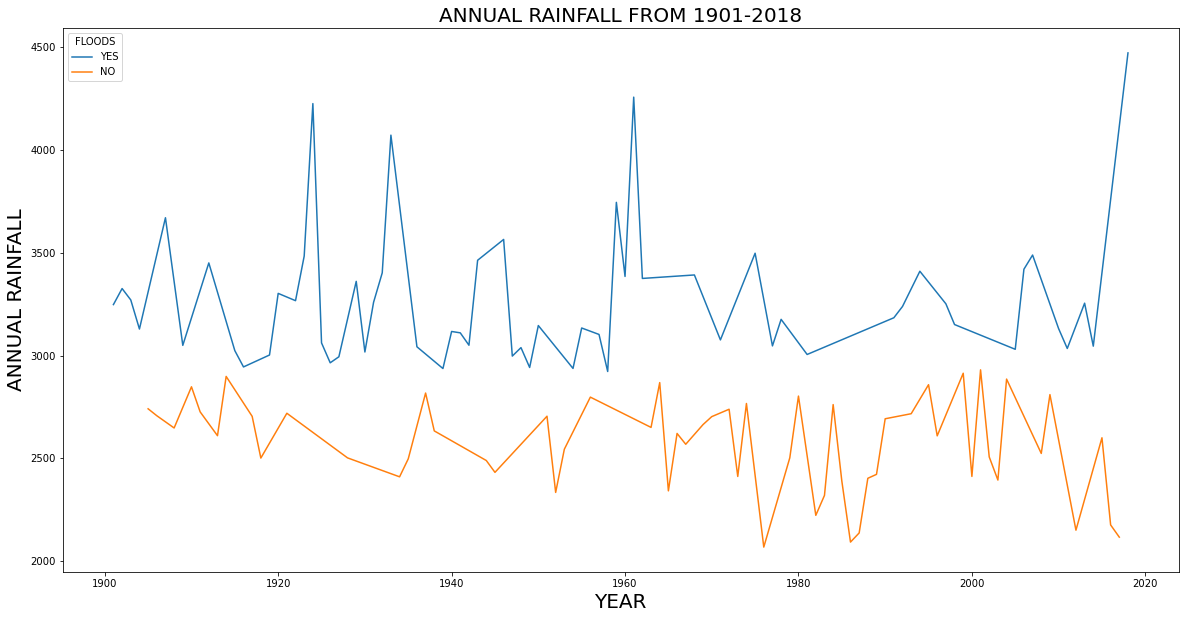

In [17]:
plt.figure(figsize=(20,10))
sns.lineplot(y=" ANNUAL RAINFALL",x="YEAR", hue= 'FLOODS',data=df)
plt.title("ANNUAL RAINFALL FROM 1901-2018",fontsize=20)
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("ANNUAL RAINFALL",fontsize=20)
plt.show()

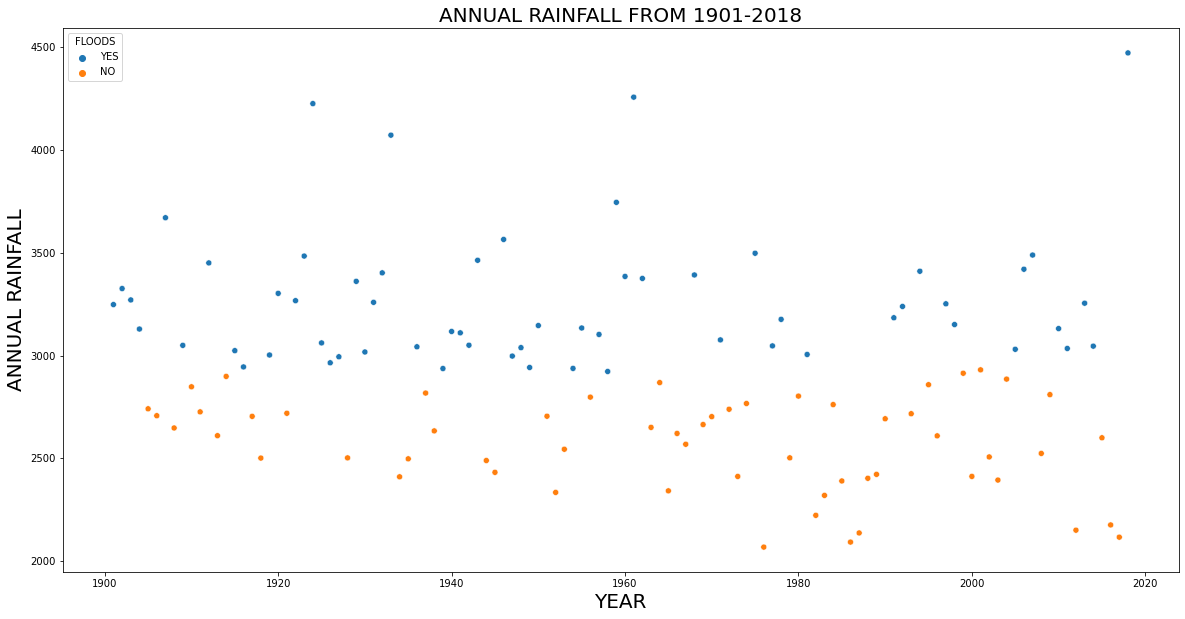

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(y=" ANNUAL RAINFALL",x="YEAR", hue= 'FLOODS',data=df)
plt.title("ANNUAL RAINFALL FROM 1901-2018",fontsize=20)
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("ANNUAL RAINFALL",fontsize=20)
plt.show()

In [19]:
import sklearn.preprocessing
from sklearn.metrics import r2_score

from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df[' ANNUAL RAINFALL']=scaler.fit_transform(df[' ANNUAL RAINFALL'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape

(118, 16)

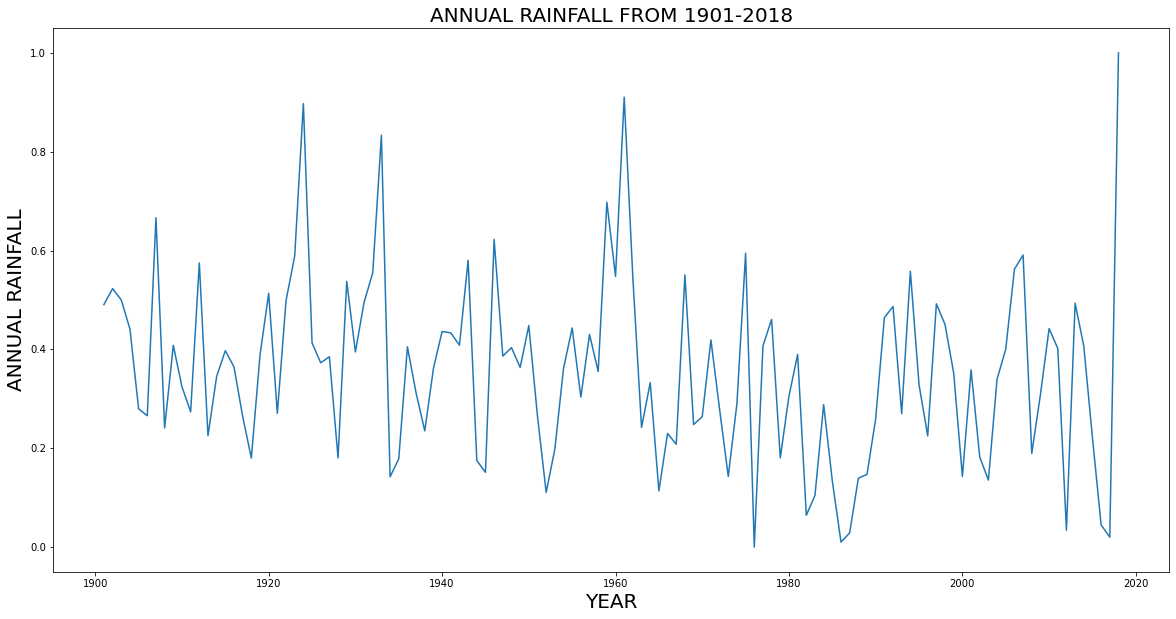

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(y=" ANNUAL RAINFALL",x="YEAR",data=df_norm)
plt.title("ANNUAL RAINFALL FROM 1901-2018",fontsize=20)
plt.xlabel("YEAR",fontsize=20)
plt.ylabel("ANNUAL RAINFALL",fontsize=20)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

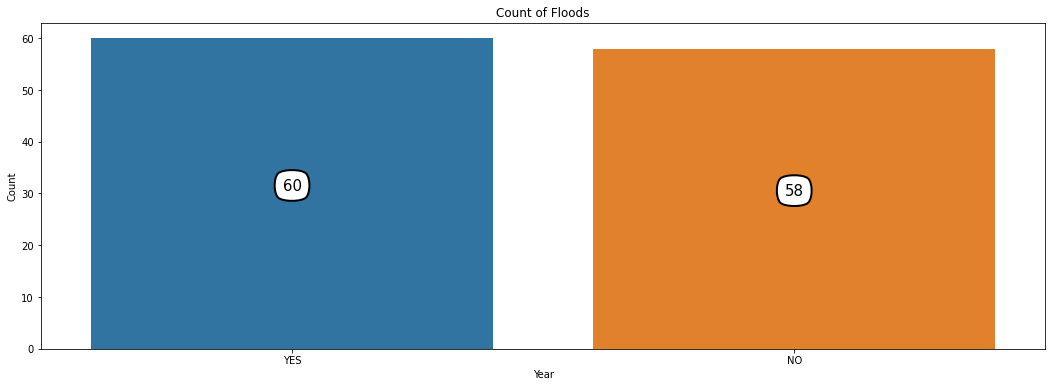

In [22]:
plt.figure(figsize=(18,6))
plots = sns.countplot(df['FLOODS'])
for bar in plots.patches:
    _ = plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height() - (bar.get_height()-3.1)/2), ha='center', va='center',
                   size=15, xytext=(0, 0),bbox=dict(boxstyle="round4,pad=0.6", fc="w", ec="black", lw=2),
                   textcoords='offset points')
plt.title('Count of Floods')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [23]:
df[df[' ANNUAL RAINFALL'] > 2931]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS


In [24]:
df[df['FLOODS'] == 'YES']

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,0.490725,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,0.523168,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,0.500125,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,0.441269,YES
6,KERALA,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,0.666459,YES
8,KERALA,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,0.408202,YES
11,KERALA,1912,1.9,15.0,11.2,122.7,217.3,948.2,833.6,534.4,136.8,469.5,138.7,22.0,0.575035,YES
14,KERALA,1915,16.9,23.5,42.7,106.0,154.5,696.1,775.6,298.8,396.6,196.6,302.5,14.9,0.397513,YES
15,KERALA,1916,0.0,7.8,22.0,82.4,199.0,920.2,513.9,396.9,339.3,320.7,134.3,8.9,0.364570,YES
18,KERALA,1919,43.0,6.1,33.9,65.9,247.0,636.8,648.0,484.2,255.9,249.2,280.1,53.0,0.388695,YES


In [25]:
df[df[' ANNUAL RAINFALL'] < 2931]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,0.490725,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,0.523168,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,0.500125,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,0.441269,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0.279844,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,0.406622,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,0.221196,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,0.044838,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,0.020090,NO


In [26]:
df[df['FLOODS'] == 'NO']

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0.279844,NO
5,KERALA,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,0.265868,NO
7,KERALA,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,0.241037,NO
9,KERALA,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,0.324349,NO
10,KERALA,1911,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6,0.273646,NO
12,KERALA,1913,3.1,5.2,20.7,75.7,198.8,541.7,763.2,247.2,176.9,422.5,109.9,45.8,0.225439,NO
13,KERALA,1914,0.7,6.8,18.1,32.7,164.2,565.3,857.7,402.2,241.0,374.4,100.9,135.2,0.345354,NO
16,KERALA,1917,2.9,47.6,79.4,38.1,122.9,703.7,342.7,335.1,470.3,264.1,256.4,41.6,0.264537,NO
17,KERALA,1918,42.9,5.0,32.8,51.3,683.0,464.3,167.5,376.0,96.4,233.2,295.4,54.1,0.180143,NO
20,KERALA,1921,43.0,4.7,15.0,171.3,104.1,489.1,639.8,641.9,156.7,302.4,136.2,15.8,0.270818,NO


In [27]:
df_corr = df.corr()
df_corr[' ANNUAL RAINFALL'].sort_values(ascending=False)

 ANNUAL RAINFALL    1.000000
JUL                 0.651990
JUN                 0.453407
SEP                 0.428344
AUG                 0.413036
MAY                 0.314723
OCT                 0.205861
NOV                 0.148783
JAN                 0.118648
MAR                 0.116103
APR                 0.112358
FEB                 0.061457
DEC                 0.042967
YEAR               -0.198048
Name:  ANNUAL RAINFALL, dtype: float64

In [28]:
df_corr.sort_values(by=' ANNUAL RAINFALL')

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
YEAR,1.000000,-0.225531,0.003879,-0.012842,0.086865,-0.059661,-0.174938,-0.223403,0.044173,0.107655,-0.030223,-0.130129,-0.123643,-0.198048
DEC,-0.123643,-0.089809,-0.127025,0.026292,-0.110392,-0.118077,-0.085188,-0.013573,0.142090,-0.011007,-0.039067,0.070720,1.000000,0.042967
FEB,0.003879,0.019613,1.000000,0.245375,0.123706,-0.083500,0.054114,0.005789,0.023259,0.066317,0.053133,-0.162880,-0.127025,0.061457
APR,0.086865,0.034807,0.123706,0.074014,1.000000,-0.114566,0.072990,0.014977,-0.047842,0.012928,0.113172,0.022206,-0.110392,0.112358
MAR,-0.012842,0.078626,0.245375,1.000000,0.074014,-0.102961,0.019000,0.018330,0.042411,0.143850,-0.023066,-0.032612,0.026292,0.116103
JAN,-0.225531,1.000000,0.019613,0.078626,0.034807,0.071420,0.189375,0.034423,0.008677,-0.113502,-0.035044,-0.011034,-0.089809,0.118648
NOV,-0.130129,-0.011034,-0.162880,-0.032612,0.022206,0.094934,0.015967,-0.028526,-0.112729,-0.027615,-0.024060,1.000000,0.070720,0.148783
OCT,-0.030223,-0.035044,0.053133,-0.023066,0.113172,0.197102,0.001156,0.025223,-0.181496,-0.032348,1.000000,-0.024060,-0.039067,0.205861
MAY,-0.059661,0.071420,-0.083500,-0.102961,-0.114566,1.000000,0.001235,-0.046518,-0.124412,0.116860,0.197102,0.094934,-0.118077,0.314723
AUG,0.044173,0.008677,0.023259,0.042411,-0.047842,-0.124412,-0.014549,0.154467,1.000000,0.098215,-0.181496,-0.112729,0.142090,0.413036


## Feature Engineering

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['FLOODS'] = le.fit_transform(df['FLOODS'])

In [30]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,0.490725,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,0.523168,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,0.500125,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,0.441269,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,0.279844,0


In [31]:
X = df.drop(columns=['SUBDIVISION', 'FLOODS', ' ANNUAL RAINFALL','YEAR'])
y = df['FLOODS']

In [32]:
columns_set =['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL']

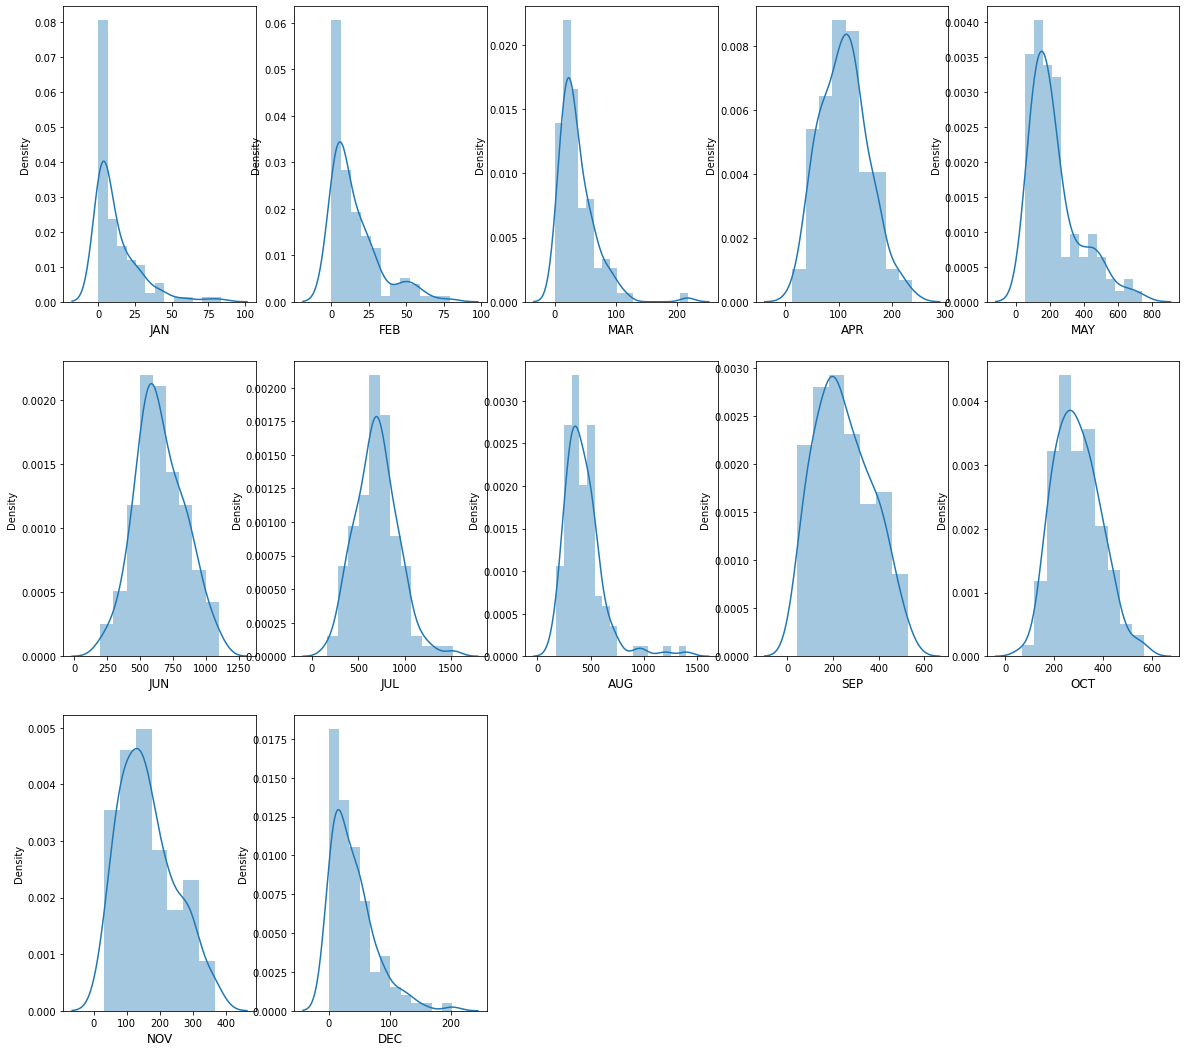

In [33]:
plt.figure(figsize = (20, 25))
feature_num = 1
for i in X:
    if feature_num < 20:
        ax = plt.subplot(4, 5, feature_num)
        sns.distplot(X[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

## Train Test Split

In [35]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix, classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

## XGBOOST Classifier

[14:55:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.83      0.83      0.83        12

    accuracy                           0.83        24
   macro avg       0.83      0.83      0.83        24
weighted avg       0.83      0.83      0.83        24



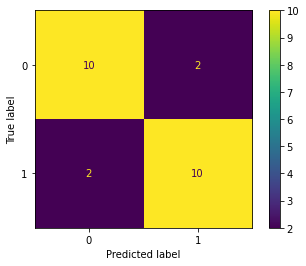

In [37]:
from xgboost import XGBRFClassifier
xgb_fit = XGBRFClassifier(random_state=42).fit(X_train, y_train)

pred_xgb = xgb_fit.predict(X_test)
print(classification_report(y_test, pred_xgb))

plot_confusion_matrix(estimator=xgb_fit, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

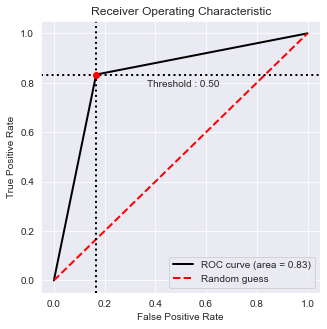

In [38]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, pred_xgb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [39]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':xgb_fit.feature_importances_}).sort_values(by ='Score', 
                                                                                                   ascending = False)
features_importances.head()

,Features,Score
5,JUN,0.185550
6,JUL,0.114604
8,SEP,0.114375
4,MAY,0.095888
10,NOV,0.095051


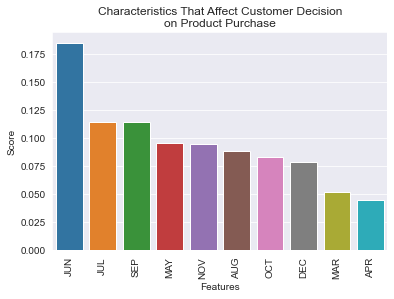

In [40]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 90)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

In [41]:
# import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB# models

rf = RandomForestClassifier(random_state=42)
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
nb = GaussianNB()

In [42]:
# modeling
models = [rf, svm, lr, dt, knn, nb]

for model in models:
    model.fit(X_train, y_train)

In [43]:
# Evaluation
ypred_rf = rf.predict(X_test)
ypred_svm = svm.predict(X_test)
ypred_lr = lr.predict(X_test)
ypred_dt = dt.predict(X_test)
ypred_knn = knn.predict(X_test)
ypred_nb = nb.predict(X_test)

## Random Forest Classifier

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



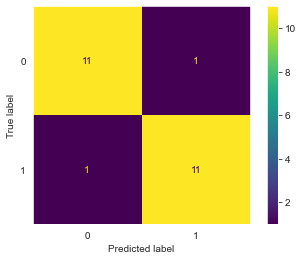

In [44]:
print(classification_report(y_test, ypred_rf))
plot_confusion_matrix(estimator=rf, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

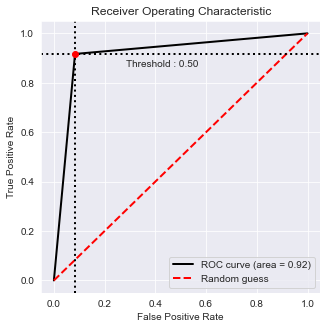

In [45]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_rf, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [46]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 
                                     'Score':rf.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
5,JUN,0.164421
7,AUG,0.128872
6,JUL,0.123588
8,SEP,0.121876
4,MAY,0.091982


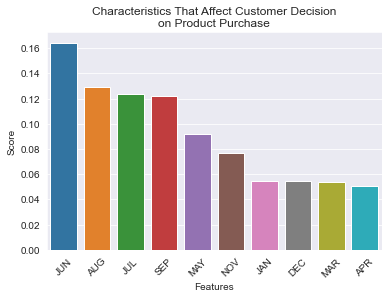

In [47]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 45)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## SVM

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



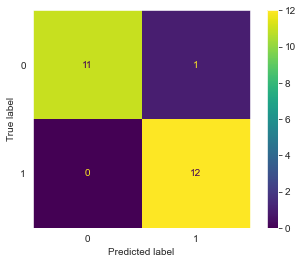

In [48]:
print(classification_report(y_test, ypred_svm))
plot_confusion_matrix(estimator=svm, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

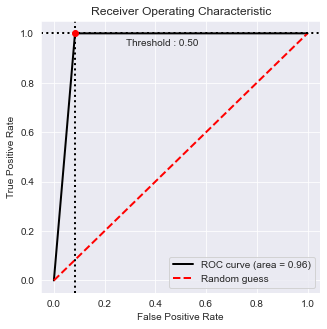

In [49]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_svm, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0       0.67      0.33      0.44        12
           1       0.56      0.83      0.67        12

    accuracy                           0.58        24
   macro avg       0.61      0.58      0.56        24
weighted avg       0.61      0.58      0.56        24



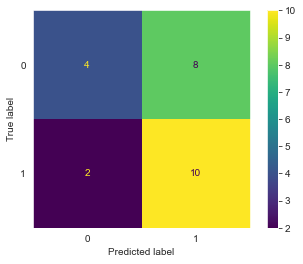

In [50]:
print(classification_report(y_test, ypred_lr))
plot_confusion_matrix(estimator=lr, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

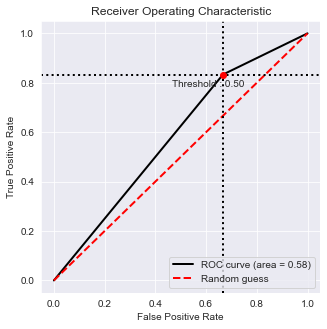

In [51]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_lr, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.90      0.75      0.82        12

    accuracy                           0.83        24
   macro avg       0.84      0.83      0.83        24
weighted avg       0.84      0.83      0.83        24



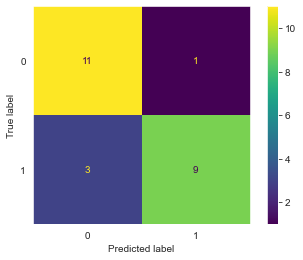

In [52]:
print(classification_report(y_test, ypred_dt))
plot_confusion_matrix(estimator=dt, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

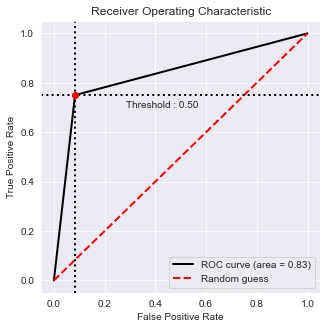

In [53]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_dt, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

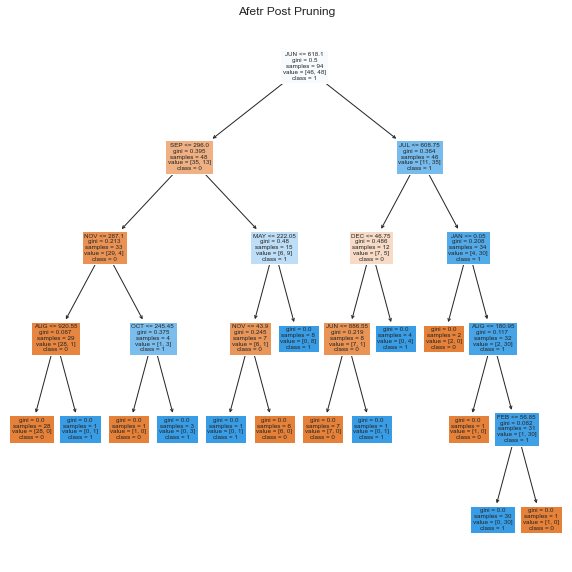

In [54]:
from sklearn import tree
plt.figure(figsize=(10,10))
features = X.columns
classes = ['0','1']
tree.plot_tree(dt,feature_names=features,class_names=classes,filled=True)
plt.title('Afetr Post Pruning')
plt.show()

In [55]:
# What features contribute the most?
features_importances = pd.DataFrame({'Features': X_train.columns, 'Score':dt.feature_importances_}).sort_values(by = 'Score', ascending = False)
features_importances.head()

,Features,Score
5,JUN,0.277386
4,MAY,0.116770
10,NOV,0.113106
8,SEP,0.100642
11,DEC,0.086919


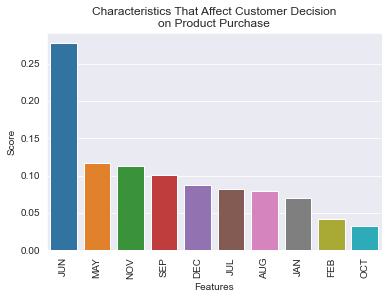

In [56]:
sns.barplot(x = 'Features', y ='Score', data = features_importances[:10]);
plt.xticks(rotation = 90)
plt.title('Characteristics That Affect Customer Decision\non Product Purchase');

## K-Nearest Neighbour

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.86      1.00      0.92        12

    accuracy                           0.92        24
   macro avg       0.93      0.92      0.92        24
weighted avg       0.93      0.92      0.92        24



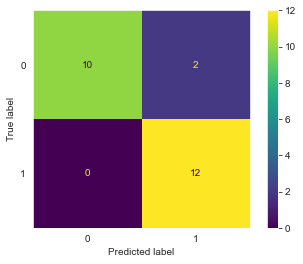

In [57]:
print(classification_report(y_test, ypred_knn))
plot_confusion_matrix(estimator=knn, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

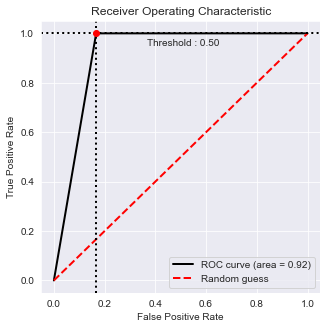

In [58]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_knn, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.75      1.00      0.86        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



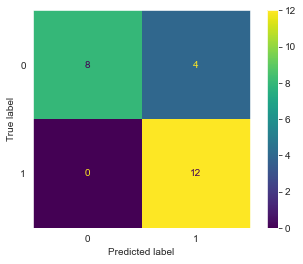

In [59]:
print(classification_report(y_test, ypred_nb))
plot_confusion_matrix(estimator=nb, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

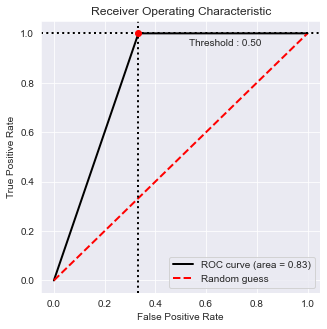

In [60]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, ypred_nb, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Hyperparameter Tuning

In [61]:
model_params = {
    'svm': {
        'model': SVC(),
        'params' : {
            'C' : [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'kernel': ['rbf'],
            'gamma' : ['scale', 'auto']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [i for i in range(1,100,5)],
            'criterion' : ['gini', 'entropy'],
            'max_features' : ['auto', 'sqrt', 'log2'],
            'n_jobs' : [-1]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1.0, 2.0, 4.0, 6.0, 8.0, 10.0],
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class' : ['auto', 'ovr', 'multinomial'],
            'n_jobs' : [-1]
        }
    }
}

In [62]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_params = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_params

,model,best_score,best_params
0,svm,0.957310,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
1,random_forest,0.883041,"{'criterion': 'gini', 'max_features': 'auto', ..."
2,logistic_regression,0.935673,"{'C': 2.0, 'multi_class': 'auto', 'n_jobs': -1..."


In [63]:
df_params['best_params'][0]

{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [64]:
model = SVC(C=1.0, gamma='scale', kernel='rbf')

In [65]:
model.fit(X_train, y_train)

SVC()

In [66]:
y_test_pred_model = model.predict(X_test)
y_train_pred_model = model.predict(X_train)

from sklearn.metrics import accuracy_score
modelrfc_acc=accuracy_score(y_test_pred_model,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred_model,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred_model,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred_model,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred_model,y_test))

Train Set Accuracy:95.74468085106383
Test Set Accuracy:95.83333333333334

Confusion Matrix:
[[11  0]
 [ 1 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        13

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



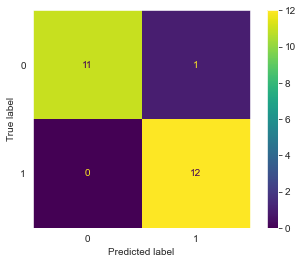

In [67]:
print(classification_report(y_test, y_test_pred_model))
plot_confusion_matrix(estimator=model, X = X_test, y_true = y_test, values_format = '');
plt.grid(False)

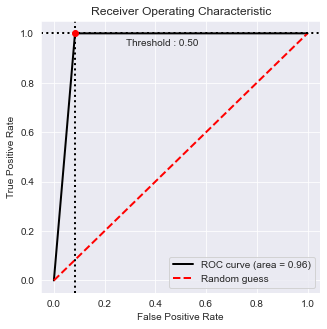

In [68]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_test_pred_model, labels=["Class 0", "Class 1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

## Kesimpulan

Berdasarkan model dan hyperparameter tuning yang sudah dilakukan, model terbaik yang bisa digunakan adalah dengan menggunakan

## SVM